<a href="https://colab.research.google.com/github/ZaichenkoNA/Stat_Prac/blob/main/Proekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
credits_df = pd.read_csv("./drive/MyDrive/credits.csv", low_memory=False)
titles_df = pd.read_csv("./drive/MyDrive/titles.csv", low_memory=False)

print(credits_df.head())
print(titles_df.head())


Mounted at /content/drive
   person_id       id             name                character   role
0       3748  tm84618   Robert De Niro            Travis Bickle  ACTOR
1      14658  tm84618     Jodie Foster            Iris Steensma  ACTOR
2       7064  tm84618    Albert Brooks                      Tom  ACTOR
3       3739  tm84618    Harvey Keitel  Matthew 'Sport' Higgins  ACTOR
4      48933  tm84618  Cybill Shepherd                    Betsy  ACTOR
         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ... 

In [ ]:
print(credits_df.info())
print(titles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64 

In [ ]:

print(titles_df.describe())

       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5850.000000  5850.000000  2106.000000  5368.000000  5.352000e+03   
mean    2016.417094    76.888889     2.162868     6.510861  2.343938e+04   
std        6.937726    39.002509     2.689041     1.163826  9.582047e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    44.000000     1.000000     5.800000  5.167500e+02   
50%     2018.000000    83.000000     1.000000     6.600000  2.233500e+03   
75%     2020.000000   104.000000     2.000000     7.300000  9.494000e+03   
max     2022.000000   240.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score  
count      5759.000000  5539.000000  
mean         22.637925     6.829175  
std          81.680263     1.170391  
min           0.009442     0.500000  
25%           2.728500     6.100000  
50%           6.821000     6.900000  
75%          16.590000     7.537500  
max        

Проверим отсутствующие данные:

In [ ]:
credits_df.isna().sum()


,0
person_id,0
id,0
name,0
character,9772
role,0


In [ ]:
titles_df.isna().sum()

,0
id,0
title,1
type,0
description,18
release_year,0
age_certification,2619
runtime,0
genres,0
production_countries,0
seasons,3744


Обработка данных:

In [4]:
import numpy as np

# Подсчет популярности актеров
actor_counts = credits_df["name"].value_counts()
credits_df["actor_popularity"] = credits_df["name"].map(actor_counts)

# Фичи по актерам
actor_popularity_per_movie = credits_df.groupby("id")["actor_popularity"].mean().reset_index()
actor_popularity_per_movie.rename(columns={"actor_popularity": "avg_actor_popularity"}, inplace=True)

actor_count_per_movie = credits_df.groupby("id")["person_id"].count().reset_index()
actor_count_per_movie.rename(columns={"person_id": "num_actors"}, inplace=True)

top_100_actors = set(actor_counts.head(100).index)
credits_df["has_top_actor"] = credits_df["name"].isin(top_100_actors)
top_actor_flag_per_movie = credits_df.groupby("id")["has_top_actor"].max().reset_index()

# Объединяем с основной таблицей
titles_df = titles_df.merge(actor_popularity_per_movie, on="id", how="left")
titles_df = titles_df.merge(actor_count_per_movie, on="id", how="left")
titles_df = titles_df.merge(top_actor_flag_per_movie, on="id", how="left")

Обработаем пропуски:

In [5]:
titles_df["avg_actor_popularity"] = titles_df["avg_actor_popularity"].fillna(0)
titles_df["num_actors"] = titles_df["num_actors"].fillna(0)
titles_df["has_top_actor"] = titles_df["has_top_actor"].fillna(False)
titles_df["runtime"] = titles_df["runtime"].fillna(titles_df["runtime"].median())
titles_df["tmdb_popularity"] = titles_df["tmdb_popularity"].fillna(0)
titles_df["imdb_votes"] = titles_df["imdb_votes"].fillna(0)

<ipython-input-5-54d65b6f67ec>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titles_df["has_top_actor"] = titles_df["has_top_actor"].fillna(False)


In [ ]:
# Обработка жанров (one-hot encoding)
genres_exploded = titles_df["genres"].str.strip("[]").str.replace("'", "").str.split(", ")
unique_genres = set([g for sublist in genres_exploded.dropna() for g in sublist])

# Формируем DataFrame с бинарными признаками для каждого жанра
genre_df = pd.DataFrame({
    f"genre_{genre}": genres_exploded.apply(lambda x: genre in x if isinstance(x, list) else False)
    for genre in unique_genres
})
titles_df = pd.concat([titles_df, genre_df], axis=1)

In [6]:
# Обработка стран (one-hot encoding)
countries_exploded = titles_df["production_countries"].str.strip("[]").str.replace("'", "").str.split(", ")
unique_countries = set([c for sublist in countries_exploded.dropna() for c in sublist])
country_df = pd.DataFrame({
    f"country_{country}": countries_exploded.apply(lambda x: country in x if isinstance(x, list) else False)
    for country in unique_countries
})
titles_df = pd.concat([titles_df, country_df], axis=1)

titles_df = titles_df.dropna(subset=["imdb_score"])
print("Предобработка завершена!")

Предобработка завершена!


Найдём распределения:

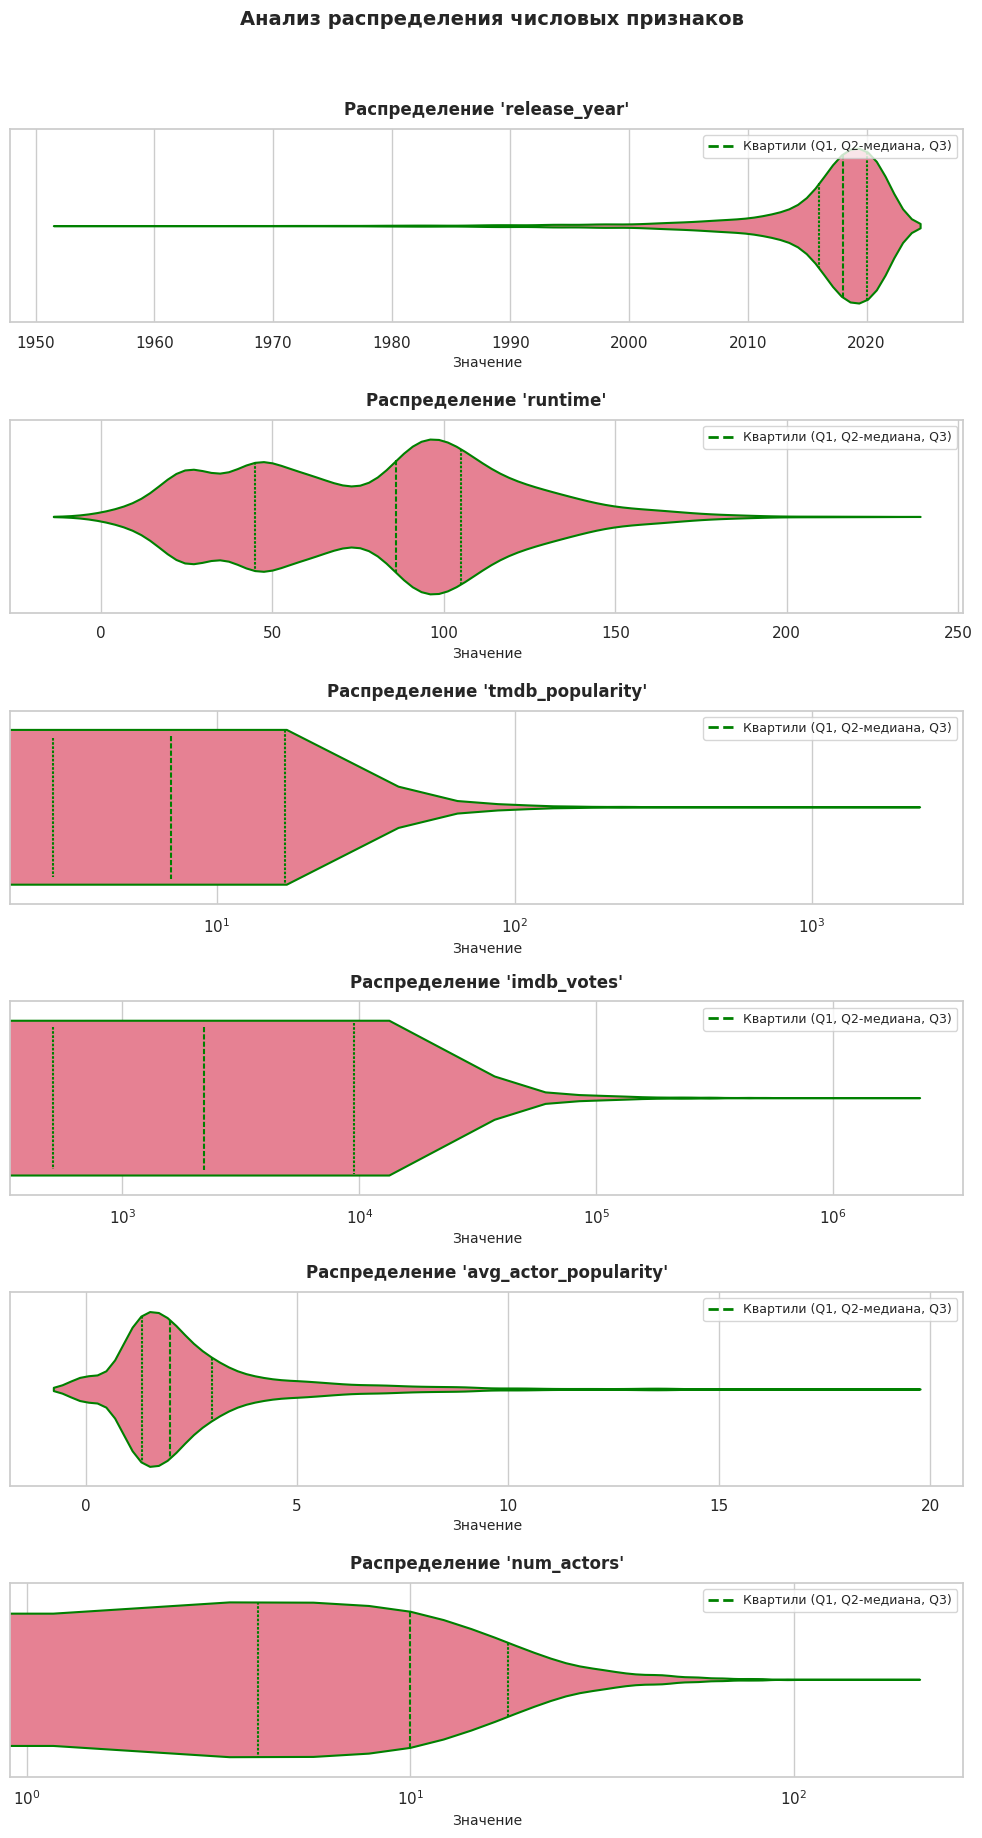

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Для создания кастомных элементов легенды

# Настройка стиля
sns.set_theme(style="whitegrid", palette="husl")

# Числовые признаки
numeric_features = ["release_year", "runtime", "tmdb_popularity", "imdb_votes", "avg_actor_popularity", "num_actors"]

# Создаем полотно
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 18), dpi=100)

for i, feature in enumerate(numeric_features):
    ax = axes[i]

    # Рисуем violin plot с квартилями
    sns.violinplot(
        x=titles_df[feature],
        ax=ax,
        inner="quartile",
        linewidth=1.5,
        linecolor="green",  # Явно задаем цвет линий
    )

    # Настройка заголовка и осей
    ax.set_title(f"Распределение '{feature}'", fontsize=12, pad=10, fontweight="bold")
    ax.set_xlabel("Значение", fontsize=10)

    # Логарифмическая шкала для некоторых признаков
    if feature in ["imdb_votes", "tmdb_popularity", "num_actors"]:
        ax.set_xscale("log")

    # Создаем кастомную легенду для квартилей
    legend_elements = [
        Line2D([0], [0], color='green', linestyle='--', lw=2,
               label='Квартили (Q1, Q2-медиана, Q3)'),
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.suptitle("Анализ распределения числовых признаков", fontsize=14, y=1.02, fontweight="bold")
plt.tight_layout()
plt.show()

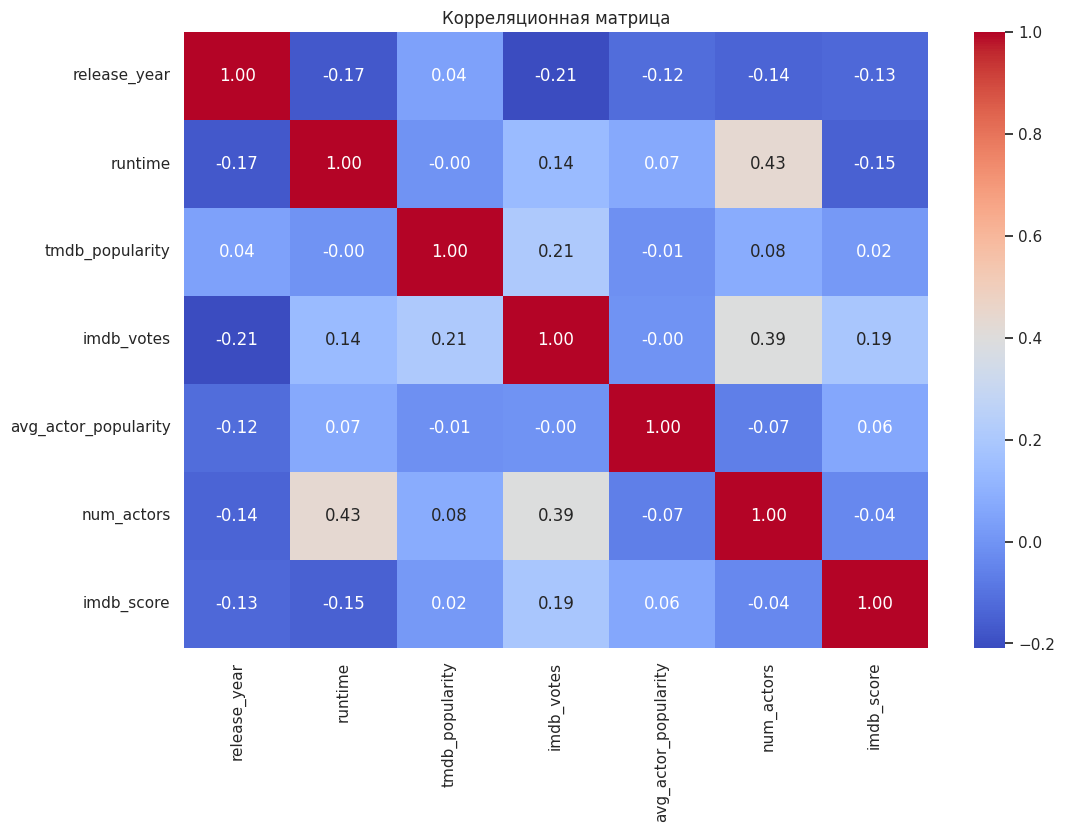

In [12]:
# Корреляционная матрица
corr_matrix = titles_df[numeric_features + ["imdb_score"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

Посмотрим на рейтинг по странам:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.2 MB/s eta 0:00:00


<ipython-input-14-b214b912e0ac>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


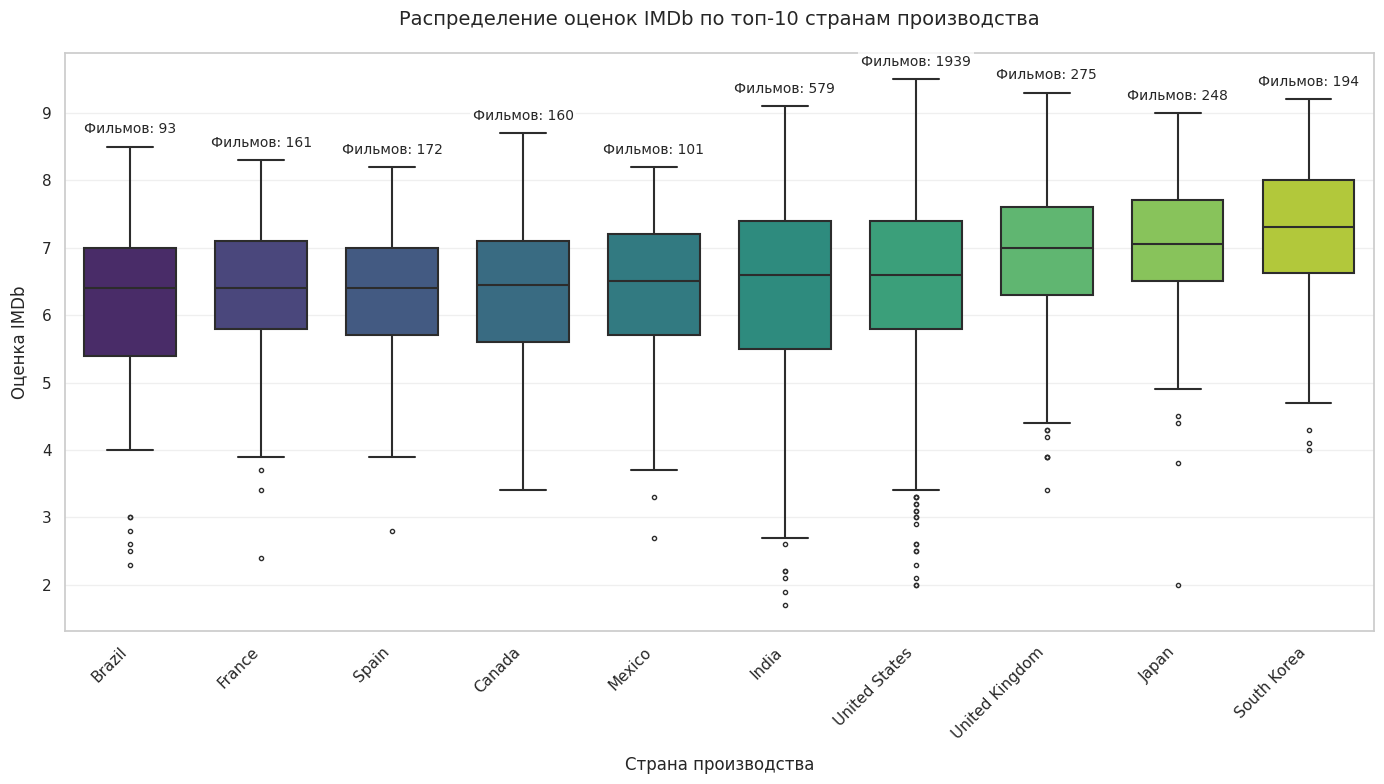

In [14]:
!pip install pycountry
import pycountry

sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Функция для преобразования кодов стран в полные названия
def extract_and_convert_country(raw_str):
    if not isinstance(raw_str, str):  # Проверяем, что это строка
        return None
    cleaned = raw_str.strip("[]").replace("'", "").replace("\"", "").strip()
    if not cleaned:
        return None
    codes = [code.strip() for code in cleaned.split(",") if code.strip()]
    if not codes:
        return None
    code = codes[0]
    country = pycountry.countries.get(alpha_2=code.upper())
    return country.name if country else None

titles_df["production_countries_full"] = titles_df["production_countries"].apply(extract_and_convert_country)

valid_titles = titles_df[titles_df["production_countries_full"].notnull()]
filtered_titles = valid_titles.copy()
# Заменяем название Южной Кореи на более короткое
filtered_titles["production_countries_full"] = filtered_titles["production_countries_full"].replace(
    "Korea, Republic of", "South Korea")

# Выбираем топ-10 стран по количеству фильмов
top_countries = filtered_titles["production_countries_full"].value_counts().head(10).index
filtered_df = filtered_titles[filtered_titles["production_countries_full"].isin(top_countries)]

# Сортируем страны по медианному значению IMDb
country_order = filtered_df.groupby("production_countries_full")["imdb_score"].median().sort_values().index

plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    x="production_countries_full",
    y="imdb_score",
    data=filtered_df,
    order=country_order,
    palette="viridis",
    width=0.7,
    linewidth=1.5,
    fliersize=3
)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Страна производства", fontsize=12, labelpad=10)
plt.ylabel("Оценка IMDb", fontsize=12, labelpad=10)
plt.title("Распределение оценок IMDb по топ-10 странам производства", fontsize=14, pad=20)

# Добавляем аннотации с количеством фильмов
counts = filtered_df["production_countries_full"].value_counts().loc[country_order]
max_scores = filtered_df.groupby("production_countries_full")["imdb_score"].max().loc[country_order]

for i, country in enumerate(country_order):
    count = counts[country]
    y_pos = max_scores[country] + 0.15
    ax.text(
        i, y_pos, f"Фильмов: {count}",
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

Посмотрим на рейтинг по актёрам:

<ipython-input-24-2ecba4427ea8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


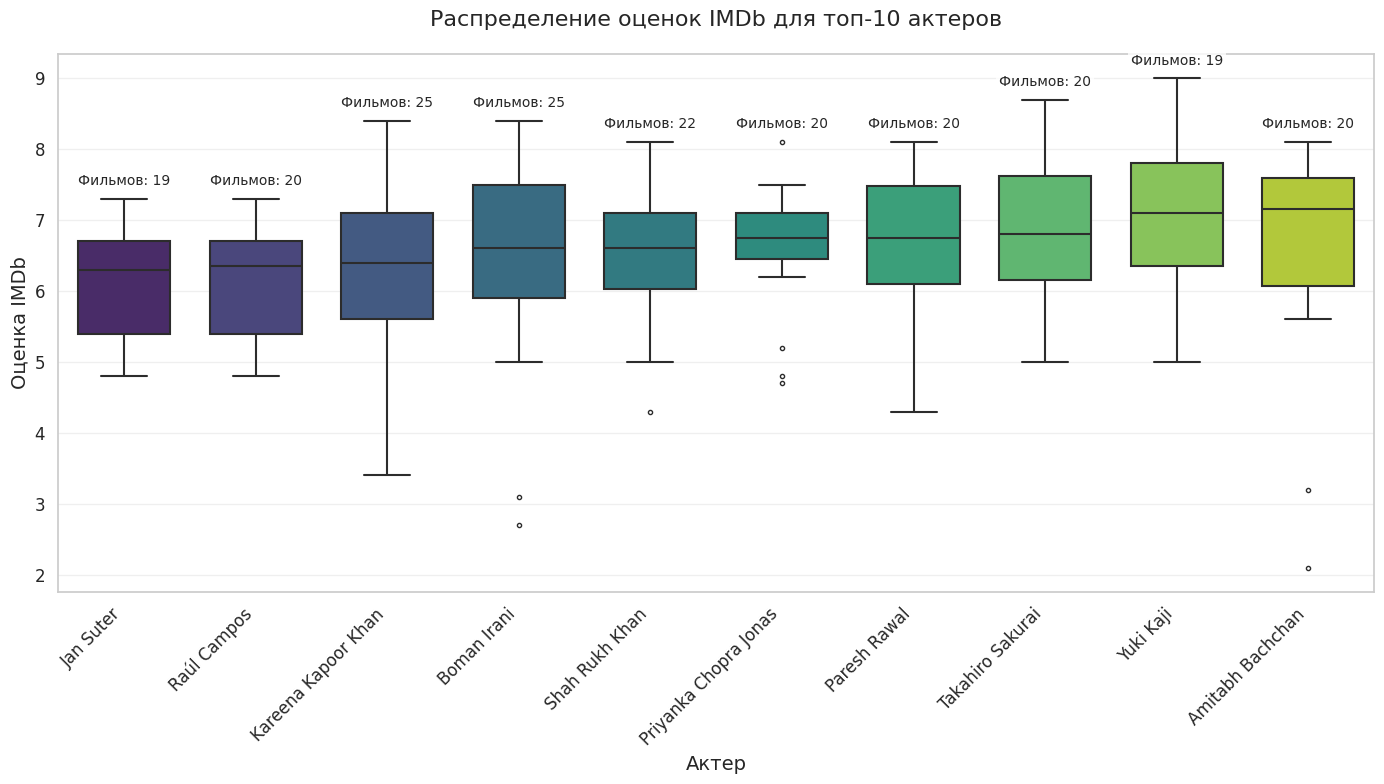

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

actor_scores = pd.merge(
    credits_df[['id', 'name']],
    titles_df[['id', 'imdb_score']],
    on='id',
    how='left'
).dropna()

TOP_N = 10
top_actors = actor_scores['name'].value_counts().head(TOP_N).index
filtered_actors = actor_scores[actor_scores['name'].isin(top_actors)]

actor_order = filtered_actors.groupby('name')['imdb_score'].median().sort_values().index

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", TOP_N)

ax = sns.boxplot(
    x='name',
    y='imdb_score',
    data=filtered_actors,
    order=actor_order,
    palette="viridis",
    width=0.7,
    linewidth=1.5,
    fliersize=3,
    showmeans=False
)

counts = filtered_actors['name'].value_counts().loc[actor_order]
for i, actor in enumerate(actor_order):
    count = counts[actor]
    ax.text(
        i,
        filtered_actors[filtered_actors['name'] == actor]['imdb_score'].max() + 0.15,
        f'Фильмов: {count}',
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

plt.title(f'Распределение оценок IMDb для топ-{TOP_N} актеров', fontsize=16, pad=20)
plt.xlabel('Актер', fontsize=14)
plt.ylabel('Оценка IMDb', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Посмотрим на жанры:

<ipython-input-28-807cae83807a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-28-807cae83807a>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


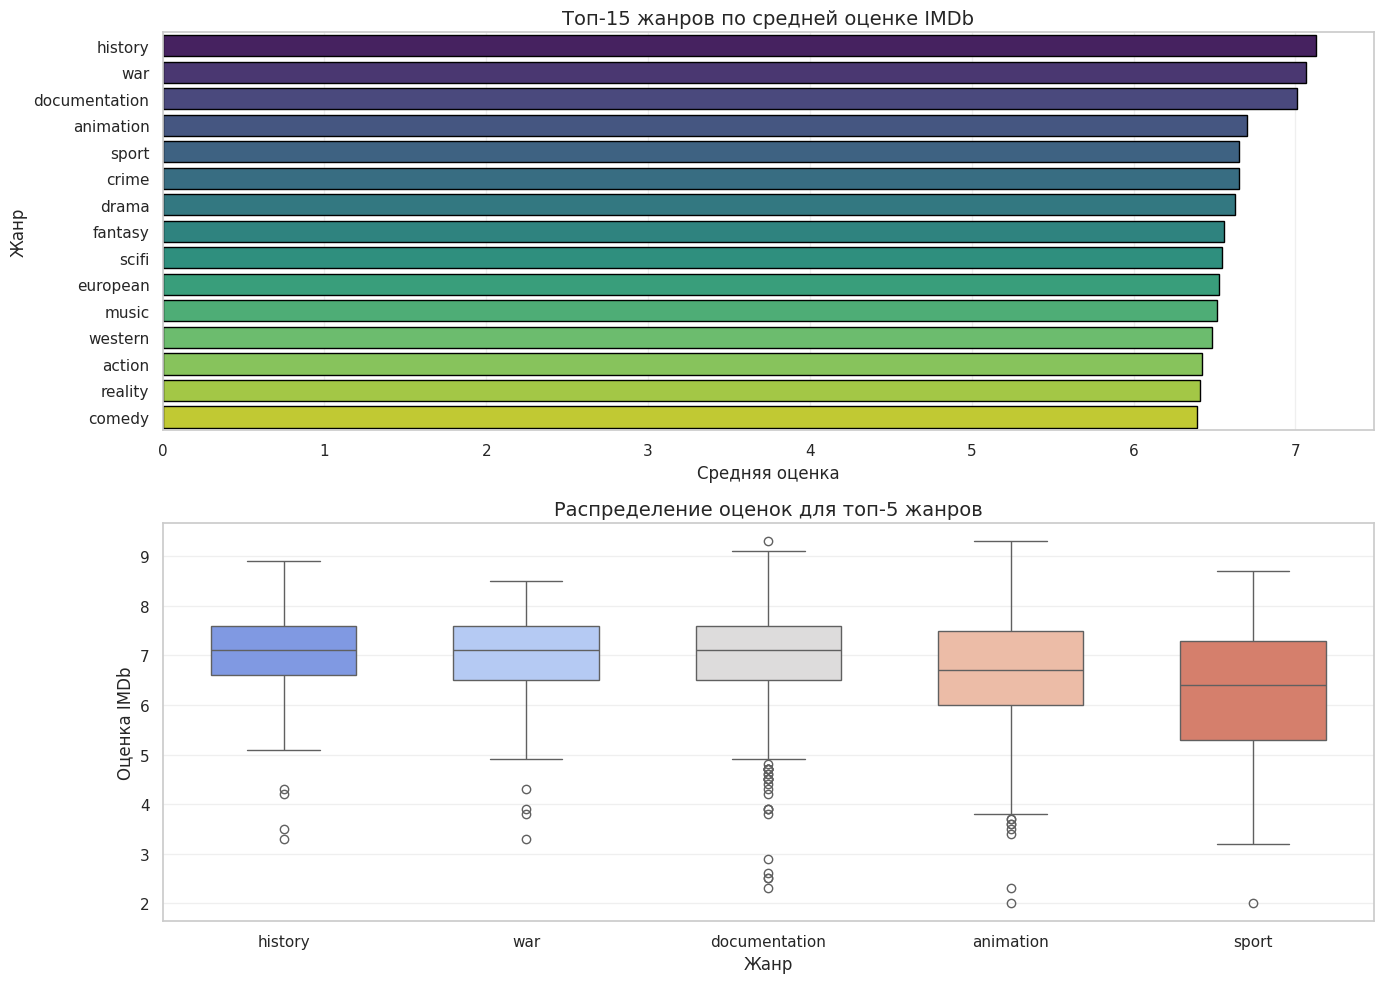

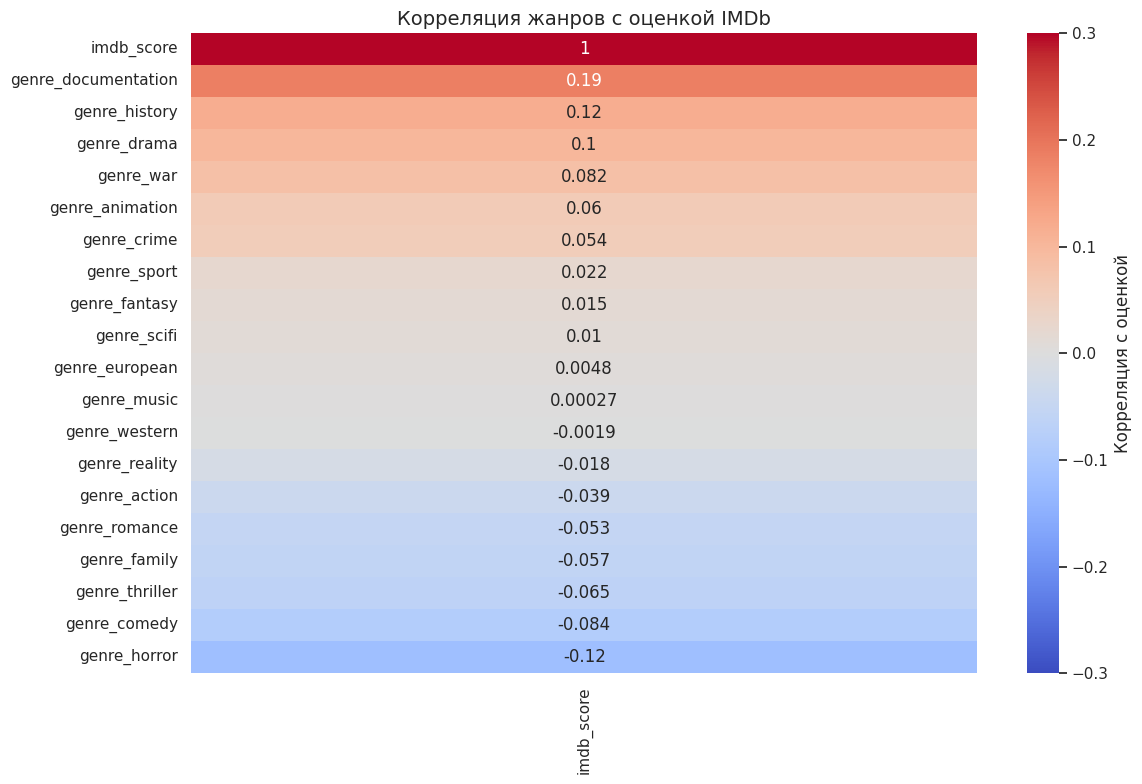

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

# 1. Преобразуем строку жанров в список
titles_df['genres_list'] = titles_df['genres'].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])

# 2. Создаем список уникальных жанров
all_genres = list(set(g for genres in titles_df['genres_list'] for g in genres))

# 3. Создаем one-hot encoding для жанров
for genre in all_genres:
    titles_df[f'genre_{genre}'] = titles_df['genres_list'].apply(lambda x: genre in x)

# 4. Создаем DataFrame для анализа
genre_stats = pd.DataFrame({
    'genre': all_genres,
    'count': [titles_df[f'genre_{g}'].sum() for g in all_genres],
    'mean_score': [titles_df[titles_df[f'genre_{g}']]['imdb_score'].mean() for g in all_genres]
}).sort_values('mean_score', ascending=False)

# 5. Визуализация - Лучший вариант: Комбинированный график
plt.figure(figsize=(14, 10))

# График 1: Средние оценки по жанрам (топ-15)
plt.subplot(2, 1, 1)
sns.barplot(
    x='mean_score',
    y='genre',
    data=genre_stats.head(15),
    palette='viridis',
    edgecolor='black'
)
plt.title('Топ-15 жанров по средней оценке IMDb', fontsize=14)
plt.xlabel('Средняя оценка', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# График 2: Boxplot для топ-5 жанров
plt.subplot(2, 1, 2)
top_5_genres = genre_stats.head(5)['genre'].tolist()
top_genres_df = titles_df[titles_df['genres_list'].apply(lambda x: any(g in x for g in top_5_genres))].copy()
top_genres_df['main_genre'] = top_genres_df['genres_list'].apply(
    lambda x: next((g for g in x if g in top_5_genres), None)
)

sns.boxplot(
    x='main_genre',
    y='imdb_score',
    data=top_genres_df,
    order=top_5_genres,
    palette='coolwarm',
    width=0.6
)
plt.title('Распределение оценок для топ-5 жанров', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Оценка IMDb', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительно: Тепловая карта корреляции жанров с оценкой
genre_cols = [col for col in titles_df.columns if col.startswith('genre_')]
corr_matrix = titles_df[genre_cols + ['imdb_score']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[['imdb_score']].sort_values('imdb_score', ascending=False),
    annot=True,
    cmap='coolwarm',
    vmin=-0.3,
    vmax=0.3,
    center=0,
    cbar_kws={'label': 'Корреляция с оценкой'}
)
plt.title('Корреляция жанров с оценкой IMDb', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

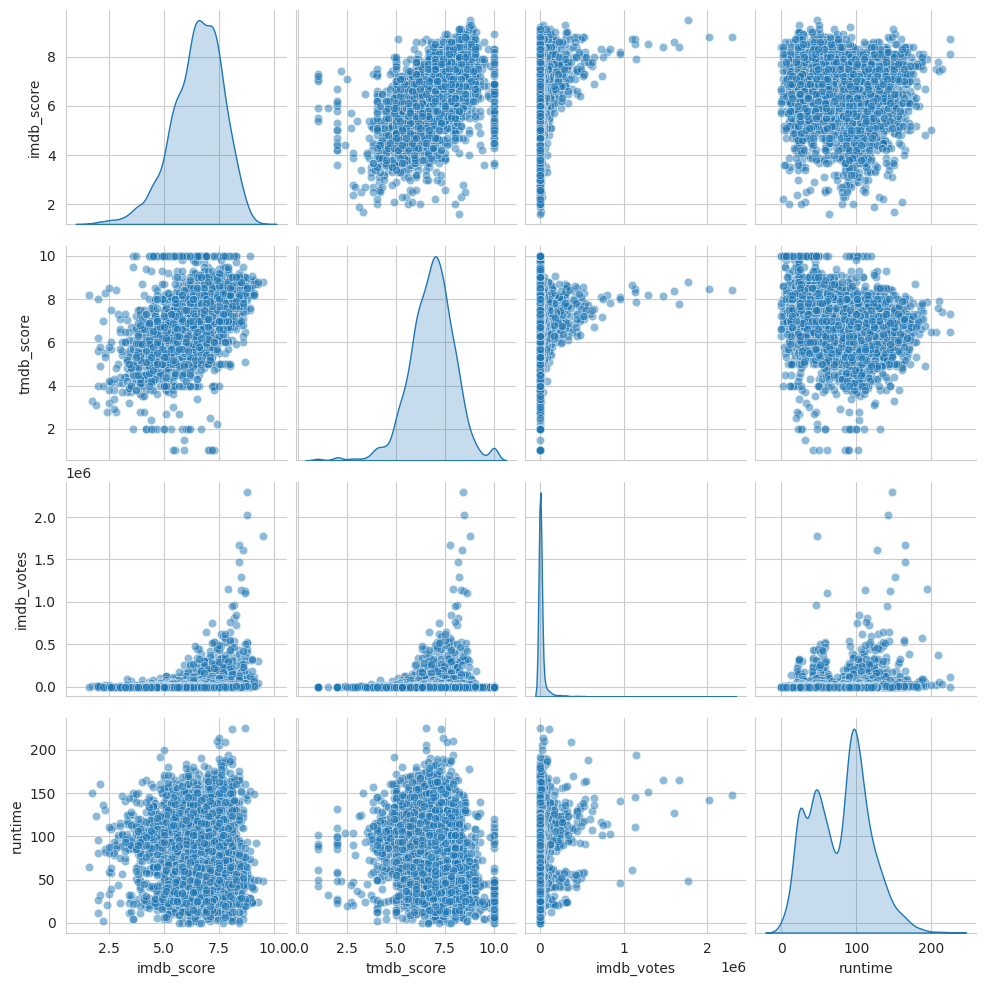

In [ ]:
import seaborn as sns

# Выбираем нужные числовые колонки
selected_columns = ["imdb_score", "tmdb_score", "imdb_votes", "runtime"]
pairplot_df = titles_df[selected_columns].dropna()

# Строим pairplot
sns.pairplot(pairplot_df, diag_kind="kde", plot_kws={'alpha': 0.5})

plt.show()